In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/dataset11.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35,0,33.6,0.627,50.0,1
1,1,85.0,66.0,29,0,26.6,0.351,31.0,0
2,8,183.0,64.0,0,0,23.3,0.672,32.0,1
3,1,89.0,66.0,23,94,28.1,0.167,21.0,0
4,0,137.0,40.0,35,168,43.1,2.288,33.0,1


Detection of Null Values

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     1
BloodPressure               1
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    1
Age                         1
Outcome                     0
dtype: int64

Replacing the Null Values

In [ ]:
df1=df.fillna(method='ffill')

In [ ]:
df1.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Checking for Class Imbalance

In [ ]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
df1.shape

(768, 9)

Upsampling Of Data

In [ ]:
from sklearn.utils import resample


In [ ]:
df1_outcome_1=df1[df1['Outcome']==1]
df1_outcome_0=df1[df1['Outcome']==0]

In [ ]:
len(df1_outcome_1)


268

In [ ]:
len(df1_outcome_0)

500

In [ ]:
df1_outcome_1_upsampled=resample(df1_outcome_1, replace=True, n_samples=len(df1_outcome_0)-len(df1_outcome_1))
df1_outcome_1_upsampled.shape

(232, 9)

In [ ]:
df1_outcome_1_new=pd.concat([df1_outcome_1,df1_outcome_1_upsampled])

In [ ]:
df1_outcome_1_new.shape

(500, 9)

In [ ]:
df1_new=pd.concat([df1_outcome_1_new, df1_outcome_0], ignore_index=True)

In [ ]:
df1_new.shape

(1000, 9)

In [ ]:
df1_new.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Identification Of Outliers using Boxplot

<Axes: xlabel='Pregnancies'>

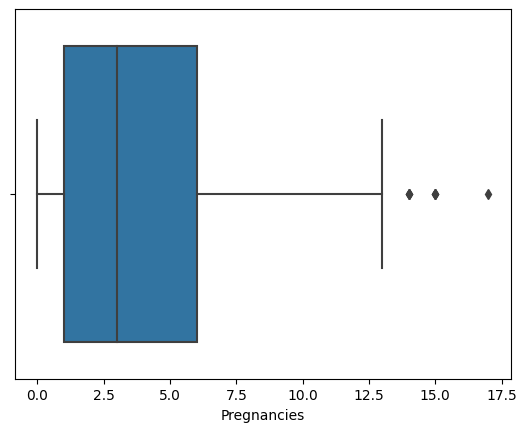

In [ ]:
sns.boxplot(x='Pregnancies', data=df1_new)

<Axes: xlabel='Glucose'>

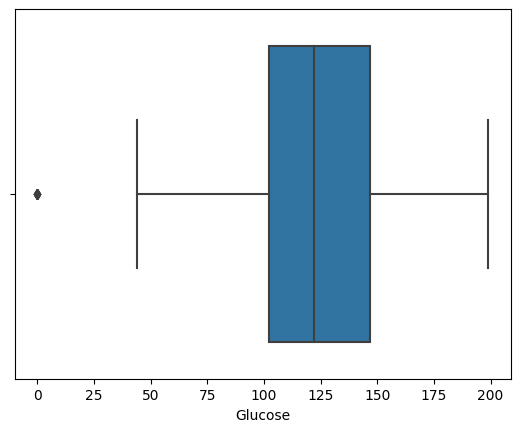

In [ ]:
sns.boxplot(x='Glucose', data=df1_new)

<Axes: xlabel='BloodPressure'>

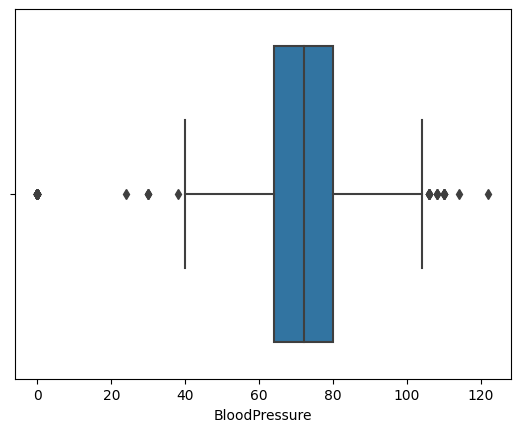

In [ ]:
sns.boxplot(x='BloodPressure', data=df1_new)

<Axes: xlabel='SkinThickness'>

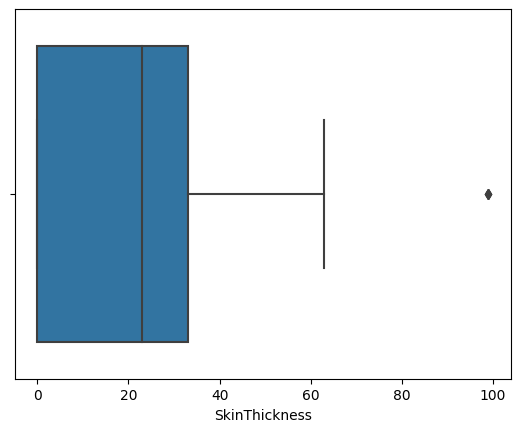

In [ ]:
sns.boxplot(x='SkinThickness', data=df1_new)

<Axes: xlabel='Insulin'>

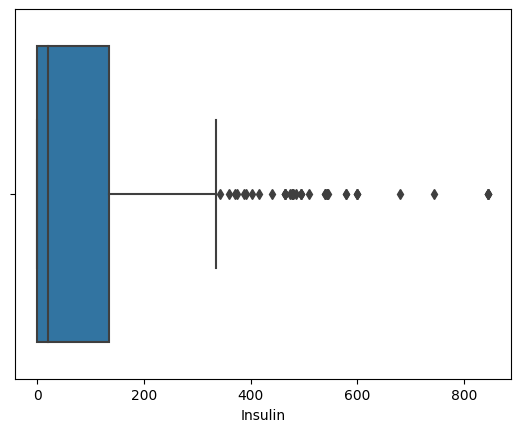

In [ ]:
sns.boxplot(x='Insulin', data=df1_new)

<Axes: xlabel='BMI'>

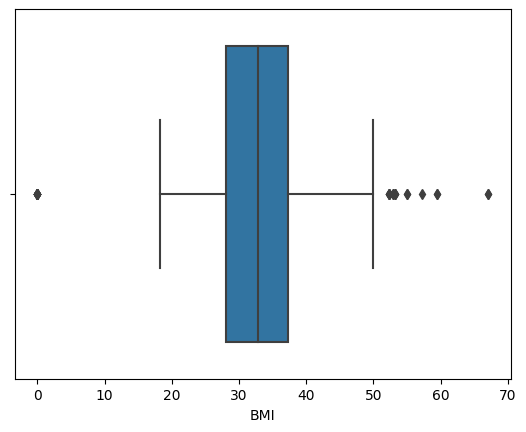

In [ ]:
sns.boxplot(x='BMI', data=df1_new)

<Axes: xlabel='DiabetesPedigreeFunction'>

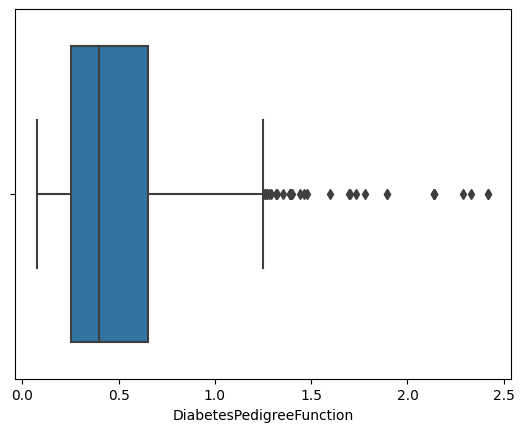

In [ ]:
sns.boxplot(x='DiabetesPedigreeFunction', data=df1_new)

<Axes: xlabel='Age'>

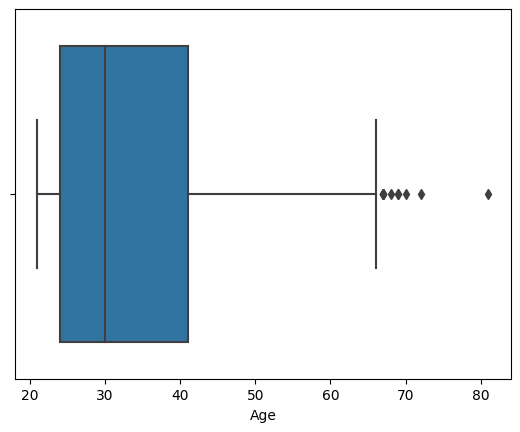

In [ ]:
sns.boxplot(x='Age', data=df1_new)

Removal of Outliers

In [ ]:
def remove_outlier(df1_new,field):
 Q1,Q3 = np.percentile(df1_new[field], [25,75])
 IQR= Q3-Q1
 LB = Q1-(1.5*IQR)
 UB = Q3+(1.5*IQR)

 no_outliers = df1_new[(df1_new[field]>=LB)&(df1_new[field]<=UB)]
 return no_outliers

In [ ]:
no_outliers=remove_outlier(df1_new, 'Glucose')

In [ ]:
df1_new.shape

(1000, 9)

In [ ]:
no_outliers.shape

(993, 9)

<Axes: xlabel='Glucose'>

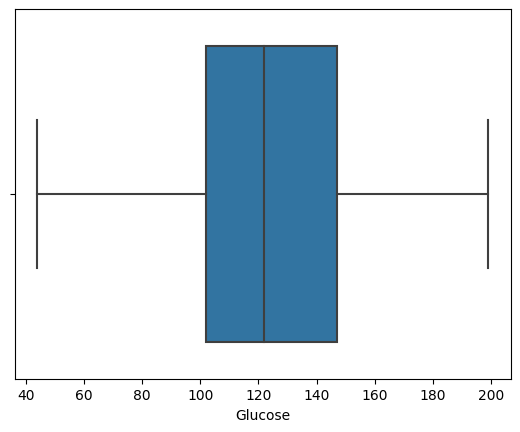

In [ ]:
sns.boxplot(x='Glucose', data=no_outliers)

In [ ]:
no_outliers=remove_outlier(df1_new, 'BloodPressure')

In [ ]:
no_outliers.shape

(925, 9)

<Axes: title={'center': 'After removal'}>

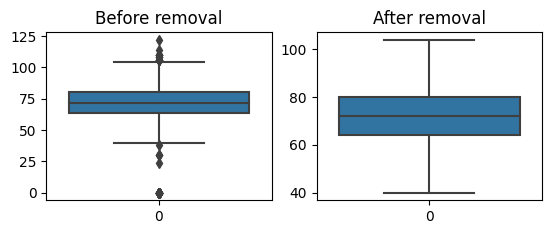

In [ ]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df1_new['BloodPressure'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(no_outliers['BloodPressure'])

In [ ]:
no_outliers=remove_outlier(df1_new, 'SkinThickness')

<Axes: title={'center': 'After removal'}>

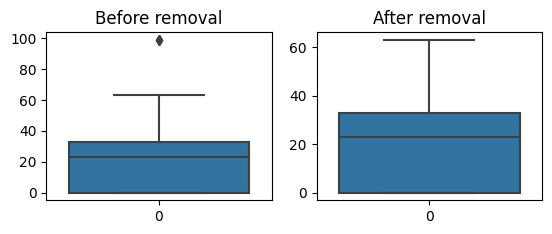

In [ ]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df1_new['SkinThickness'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(no_outliers['SkinThickness'])

In [ ]:
no_outliers=remove_outlier(df1_new, 'Insulin')

<Axes: title={'center': 'After removal'}>

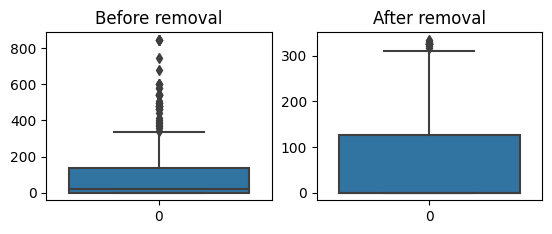

In [ ]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df1_new['Insulin'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(no_outliers['Insulin'])

In [ ]:
no_outliers=remove_outlier(df1_new, 'BMI')

<Axes: title={'center': 'After removal'}>

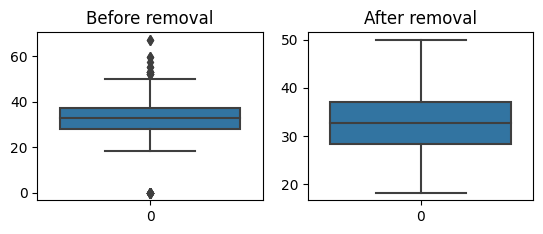

In [ ]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df1_new['BMI'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(no_outliers['BMI'])

In [ ]:
no_outliers=remove_outlier(df1_new, 'DiabetesPedigreeFunction')

<Axes: title={'center': 'After removal'}>

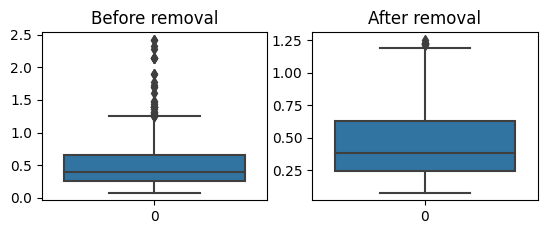

In [ ]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df1_new['DiabetesPedigreeFunction'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(no_outliers['DiabetesPedigreeFunction'])

In [ ]:
no_outliers=remove_outlier(df1_new, 'Age')

<Axes: title={'center': 'After removal'}>

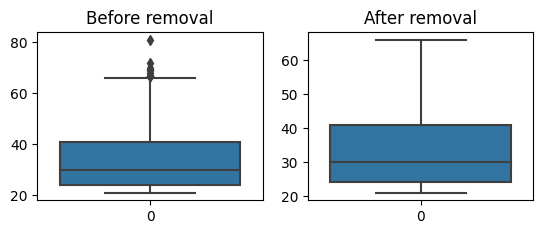

In [ ]:
plt.subplot(221)
plt.title('Before removal')
sns.boxplot(df1_new['Age'])

plt.subplot(222)
plt.title('After removal')
sns.boxplot(no_outliers['Age'])

In [ ]:
no_outliers.shape

(989, 9)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

Defining Independent and Dependent Variables

In [ ]:
x = no_outliers.drop(['Outcome'],axis =1)
y = no_outliers['Outcome']

Splitting the Data into Training and Testing Set

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

Support Vector Classifier (SVC)

In [ ]:
model = SVC(C=1, kernel= 'poly')

In [ ]:
model.fit(x_train, y_train)

SVC(C=1, kernel='poly')

In [ ]:
y_pred_svc=model.predict(x_test)

In [ ]:
accuracy_score(y_pred_svc, y_test)

0.7096774193548387

In [ ]:
print(classification_report(y_pred_svc,y_test))

              precision    recall  f1-score   support

           0       0.82      0.70      0.76       161
           1       0.57      0.72      0.64        87

    accuracy                           0.71       248
   macro avg       0.70      0.71      0.70       248
weighted avg       0.73      0.71      0.72       248



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr=LogisticRegression(max_iter=200)

In [ ]:
lr.fit(x_train,y_train)

LogisticRegression(max_iter=200)

In [ ]:
y_pred_lr=lr.predict(x_test)

In [ ]:
accuracy_score(y_pred_lr,y_test)

0.7459677419354839

In [ ]:
print(classification_report(y_pred_lr,y_test))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       144
           1       0.68      0.73      0.71       104

    accuracy                           0.75       248
   macro avg       0.74      0.74      0.74       248
weighted avg       0.75      0.75      0.75       248



Decision Tree Classifier (Gini Index)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt_gini=DecisionTreeClassifier(criterion='gini')

In [ ]:
dt_gini.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(0.4858508726899384, 0.96875, 'x[1] <= 123.5\ngini = 0.499\nsamples = 741\nvalue = [356, 385]'),
 Text(0.23261036960985626, 0.90625, 'x[7] <= 29.5\ngini = 0.413\nsamples = 371\nvalue = [263, 108]'),
 Text(0.1302618069815195, 0.84375, 'x[5] <= 45.4\ngini = 0.234\nsamples = 207\nvalue = [179, 28]'),
 Text(0.09830595482546202, 0.78125, 'x[3] <= 40.5\ngini = 0.196\nsamples = 200\nvalue = [178, 22]'),
 Text(0.059034907597535935, 0.71875, 'x[5] <= 30.95\ngini = 0.144\nsamples = 179\nvalue = [165, 14]'),
 Text(0.024640657084188913, 0.65625, 'x[0] <= 7.5\ngini = 0.039\nsamples = 101\nvalue = [99, 2]'),
 Text(0.01642710472279261, 0.59375, 'x[6] <= 0.672\ngini = 0.02\nsamples = 100\nvalue = [99, 1]'),
 Text(0.008213552361396304, 0.53125, 'gini = 0.0\nsamples = 85\nvalue = [85, 0]'),
 Text(0.024640657084188913, 0.53125, 'x[6] <= 0.686\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.01642710472279261, 0.46875, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.03285420944558522, 0.46

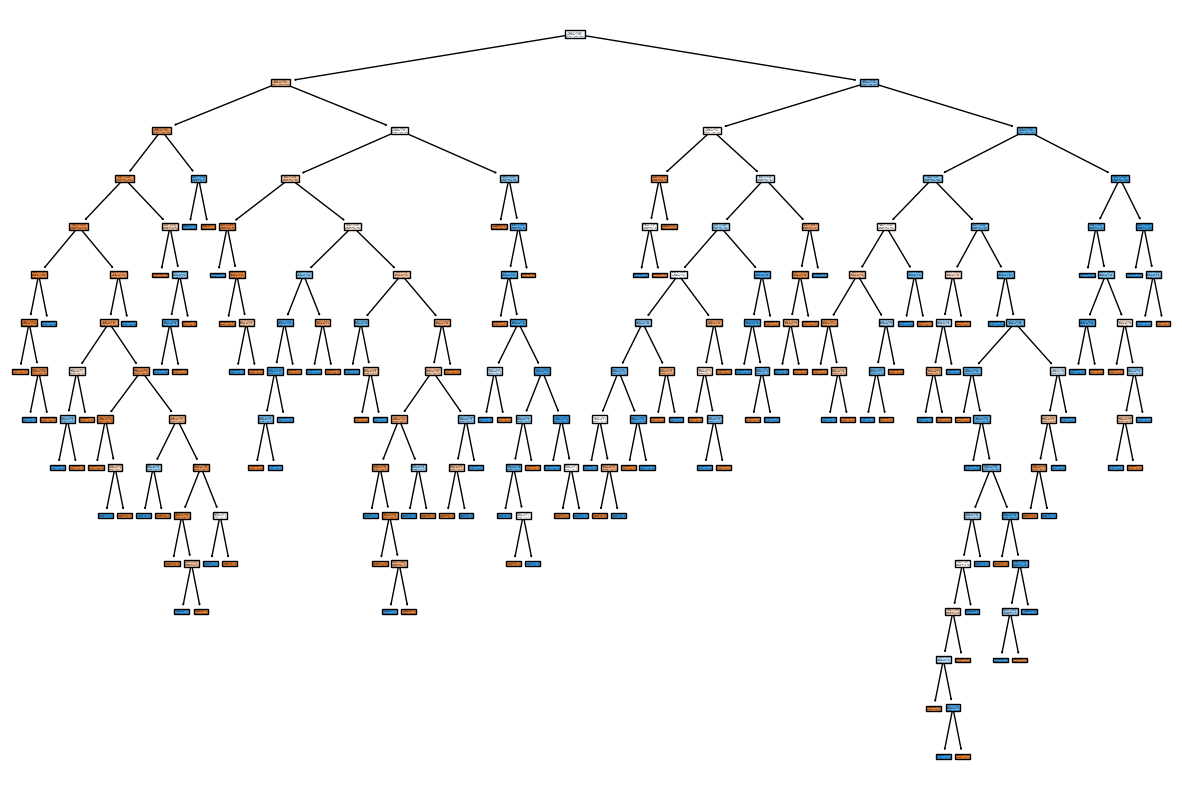

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_gini,filled=True)

In [ ]:
y_pred_gini = dt_gini.predict(x_test)

In [ ]:
accuracy_score(y_pred_gini,y_test)

0.9595959595959596

In [ ]:
print(classification_report(y_pred_gini,y_test))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95        84
           1       0.98      0.95      0.96       114

    accuracy                           0.96       198
   macro avg       0.96      0.96      0.96       198
weighted avg       0.96      0.96      0.96       198



Decision Tree Classifier (Entropy)

In [ ]:
dt_entropy=DecisionTreeClassifier(criterion='entropy', max_depth=4)
dt_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.56, 0.9, 'x[1] <= 154.5\nentropy = 1.0\nsamples = 791\nvalue = [405, 386]'),
 Text(0.32, 0.7, 'x[5] <= 26.3\nentropy = 0.956\nsamples = 617\nvalue = [384, 233]'),
 Text(0.16, 0.5, 'x[5] <= 9.1\nentropy = 0.286\nsamples = 120\nvalue = [114, 6]'),
 Text(0.08, 0.3, 'x[7] <= 27.0\nentropy = 0.971\nsamples = 10\nvalue = [6, 4]'),
 Text(0.04, 0.1, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.12, 0.1, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.24, 0.3, 'x[6] <= 0.675\nentropy = 0.131\nsamples = 110\nvalue = [108, 2]'),
 Text(0.2, 0.1, 'entropy = 0.0\nsamples = 94\nvalue = [94, 0]'),
 Text(0.28, 0.1, 'entropy = 0.544\nsamples = 16\nvalue = [14, 2]'),
 Text(0.48, 0.5, 'x[1] <= 99.5\nentropy = 0.995\nsamples = 497\nvalue = [270, 227]'),
 Text(0.4, 0.3, 'x[5] <= 37.35\nentropy = 0.744\nsamples = 123\nvalue = [97, 26]'),
 Text(0.36, 0.1, 'entropy = 0.524\nsamples = 93\nvalue = [82, 11]'),
 Text(0.44, 0.1, 'entropy = 1.0\nsamples = 30\nvalue = [15, 15]'),
 Text(0.56, 0

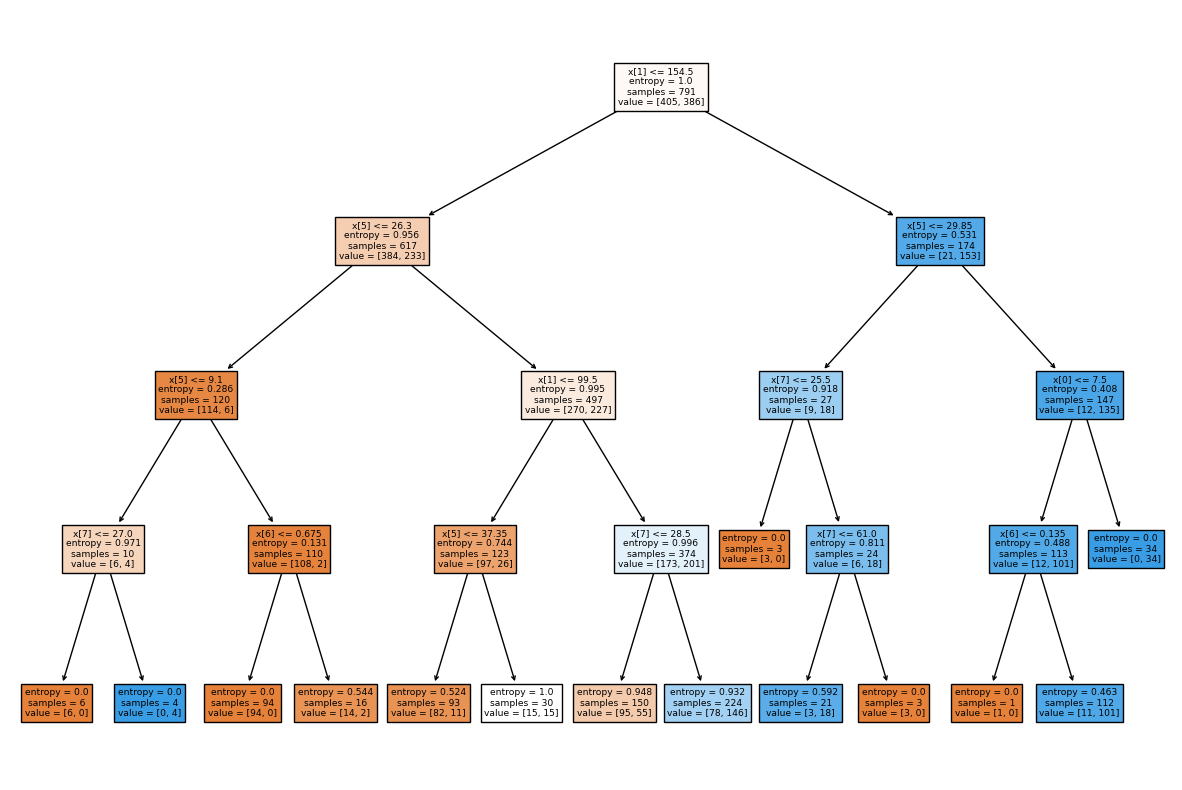

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(dt_entropy,filled=True)

In [ ]:
y_pred_entropy=dt_entropy.predict(x_test)

In [ ]:
accuracy_score(y_pred_entropy,y_test)

0.7676767676767676

In [ ]:
print(classification_report(y_pred_entropy,y_test))

              precision    recall  f1-score   support

           0       0.82      0.71      0.76       102
           1       0.73      0.83      0.78        96

    accuracy                           0.77       198
   macro avg       0.77      0.77      0.77       198
weighted avg       0.77      0.77      0.77       198



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=20)
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [ ]:
y_pred_rfc=rfc.predict(x_test)

In [ ]:
accuracy_score(y_pred_rfc,y_test)

0.8737373737373737

In [ ]:
print(classification_report(y_pred_rfc,y_test))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        93
           1       0.86      0.90      0.88       105

    accuracy                           0.87       198
   macro avg       0.88      0.87      0.87       198
weighted avg       0.87      0.87      0.87       198



Grid Search CV

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [ ]:
param_grid = {'n_estimators' : [10,20,30,40], 'criterion':['gini','entropy','log_loss'], 'max_depth':[1,2,3,4,5,6,None]}
grid_rfc = GridSearchCV(rfc, param_grid = param_grid, verbose =2, cv = 7)

In [ ]:
grid_rfc.fit(x_train,y_train)

Fitting 7 folds for each of 84 candidates, totalling 588 fits
[CV] END .......criterion=gini, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=10; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_estimators=20; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, n_

GridSearchCV(cv=7, estimator=RandomForestClassifier(n_estimators=20),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6, None],
                         'n_estimators': [10, 20, 30, 40]},
             verbose=2)

In [ ]:
grid_rfc.best_params_

{'criterion': 'entropy', 'max_depth': None, 'n_estimators': 40}

In [ ]:
grid_rfc.best_score_


0.8331226295828066

From this we can conclude that Decision Tree Classifier(Gini Index) gives us the most accuracy.